Business understanding

The data we`ve been provided with focuses on the feedbacks of passengers in different airlines. The stakeholders here are; Virgin America, American, Turkish airlines, The flight customers, The airports where these airlines operate and who collected the data in form of tweets.
The overall conclusion from the feedbacks is that the customers are not satisfied with how the flights operate. We have more negative feedbacks than positive and neutral combined. We are interested to know why are the flights delayed. How are passengers treated right from check in to during flights. What needs to be changed to be done to improve the present conditions and services so as to get more positive feedback from the customers.
Our success metric in this case is the ratio of positive feedback to that of negative and neutral combined. The positive reviews should outbalance the other two for it to be a success. In our project we assume that all the six airlines have the same operating business models and the conclusions that we are going to draw from this project are going to cut across all the airlines. The limitation we have here is that we lack data from the airline companies. For instance, maybe the flight was delayed due to valid reasons like hostile weather conditions or security issues.



In [25]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [26]:
df=pd.read_csv('Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [2]:
df.info

<bound method DataFrame.info of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereas

In [3]:
df.shape

(14640, 15)

In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Data understanding
We are dealing with data already collected by someone else and saved to a file in form of csv. The source of this data was twitter on the feedback section from passengers. The data has 14640 rows and 15 columns. The columns contain sections where we have the name of the airline, the actual feedback, name of the passenger, tweet ID, time and location of the tweet. The confidence on the airline based on the sentiments provided have been put in a scale of 0-1 with 1 representing the highest confidence level.


In [5]:
df.duplicated().sum()

36

In [6]:
print(df[df.duplicated()])

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   
12069  570300915418320897          negative                           1.0   
12074  570299252141903873          positive                           1.0   
12075  570298770136674304          negative                           1.0   
12078  570298644475346945          negative                           1.0   
12079  570298371140939776          negative                           1.0   
12086  570296996445204480          negative                           1.0   
12093  570295576446808065          negative                           1.0   

In [7]:
df.isnull()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


In [8]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Data cleaning


This section we are going deeper to our data to pick what we need for this study and leave out that which is not important to us. There are columns like the name of the passenger, the time of the tweet and location of the tweet that we are going to filter out. Our data has lots of missing values and we are going to handle this using the data.fillna() methods. We have several duplicates and outliers in our data. The format of our data is good and we will retain that.


In [9]:
#Drop unnecessary columns
df1 = df.drop(columns=['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'user_timezone'])

In [12]:
#Fill in the missing values using the mode
df1=df1.apply(lambda x: x.fillna(x.mode()[0]))
df1


,airline_sentiment,negativereason,airline,tweet_created,tweet_location
0,neutral,Customer Service Issue,Virgin America,2015-02-24 11:35:52 -0800,"Boston, MA"
1,positive,Customer Service Issue,Virgin America,2015-02-24 11:15:59 -0800,"Boston, MA"
2,neutral,Customer Service Issue,Virgin America,2015-02-24 11:15:48 -0800,Lets Play
3,negative,Bad Flight,Virgin America,2015-02-24 11:15:36 -0800,"Boston, MA"
4,negative,Can't Tell,Virgin America,2015-02-24 11:14:45 -0800,"Boston, MA"
...,...,...,...,...,...
14635,positive,Customer Service Issue,American,2015-02-22 12:01:01 -0800,"Boston, MA"
14636,negative,Customer Service Issue,American,2015-02-22 11:59:46 -0800,Texas
14637,neutral,Customer Service Issue,American,2015-02-22 11:59:15 -0800,"Nigeria,lagos"
14638,negative,Customer Service Issue,American,2015-02-22 11:59:02 -0800,New Jersey


In [14]:
#Check for duplicates
df1.duplicated().sum()

110

In [17]:
#Drop the duplicates
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [ ]:
#Check for unique values in the columns
df1['airline_sentiment'].value_counts()

airline_sentiment
negative    9116
neutral     3074
positive    2340
Name: count, dtype: int64

In [19]:
df1['negativereason'].value_counts()

negativereason
Customer Service Issue         8305
Late Flight                    1655
Can't Tell                     1185
Cancelled Flight                834
Lost Luggage                    719
Bad Flight                      578
Flight Booking Problems         527
Flight Attendant Complaints     476
longlines                       177
Damaged Luggage                  74
Name: count, dtype: int64

In [20]:
df1['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2649
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [21]:
df1['tweet_location'].value_counts()

tweet_location
Boston, MA              4855
New York, NY             155
Washington, DC           147
USA                      125
New York                 125
                        ... 
Milwaukee wi               1
Seattle (duh!)             1
South ~O-H-I-O~ Side       1
Pocono Raceway             1
Nigeria,lagos              1
Name: count, Length: 3081, dtype: int64

## Exploratory Data Analysis

In this section we aim to understanf our deeper on a deeper level before we start modelling. We use visualizations for better understanding. 

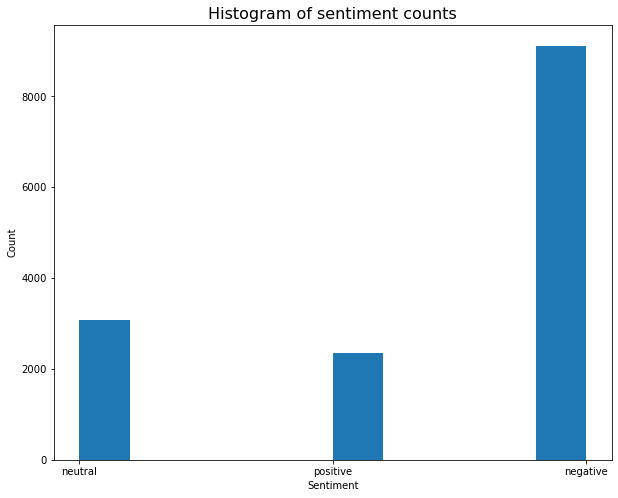

In [34]:
plt.figure(figsize=(10,8))
plt.hist(df1['airline_sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of sentiment counts', fontsize=16);

From the reviws collected from the tweets, we have a high number of negative feedbacks, followed by neutral then a low number of positive reviews. This is a sign of a business that is about to collapse if at all it hasn`t already.We`ll go a step further and find out the causes the disatisfaction of customers.

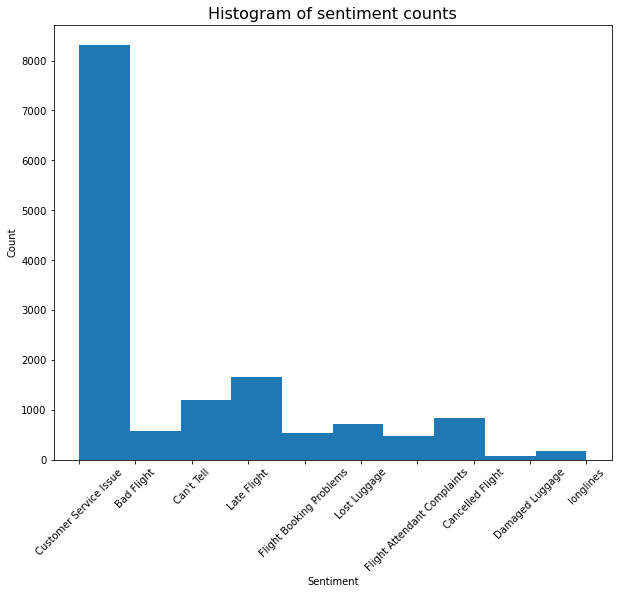

In [42]:
plt.figure(figsize=(10,8))
plt.hist(df1['negativereason'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='center')
plt.title('Histogram of sentiment counts', fontsize=16);